## Import



In [ ]:
!pip install ucimlrepo

In [ ]:
import torch
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
import copy
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
import time
import seaborn as sns

In [ ]:
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

## Train

In [ ]:
#======FUNZIONI DI TRAINING=====
#ADAM
def train_model_adam(model, train_loader, val_loader, criterion, epochs, patience):
    params = list(model.parameters())
    v = [torch.zeros_like(param) for param in params]
    s = [torch.zeros_like(param) for param in params]
    loss_history = []
    val_loss_history = []

    best_val_loss = float('inf')
    best_model_params = copy.deepcopy(model.state_dict())  # Salva i pesi migliori
    epochs_no_improve = 0  # Conta le epoche senza miglioramento

    for epoch in range(1, epochs + 1):
        model.train()  # Modalità training
        epoch_loss = 0

        for X, y in train_loader:
            y_pred = model(X)
            loss = criterion(y_pred, y.unsqueeze(1))
            epoch_loss += loss.item()

            # Backpropagation
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            # Calcolo e aggiornamento dei gradienti con Adam
            grads = [param.grad for param in params]
            params, v, s = ADAM(params, grads, v, s, epoch, learning_rate=0.001, beta1=0.9, beta2=0.99, eps=1e-8)

            # Reset dei gradienti
            for param in params:
                param.grad = None

        avg_train_loss = epoch_loss / len(train_loader)
        loss_history.append(avg_train_loss)

        # Validazione
        model.eval()  # Modalità valutazione
        val_loss = 0

        with torch.no_grad():
            for X_val, y_val in val_loader:
                y_val_pred = model(X_val)
                val_batch_loss = criterion(y_val_pred, y_val.unsqueeze(1))
                val_loss += val_batch_loss.item()

        avg_val_loss = val_loss / len(val_loader)
        val_loss_history.append(avg_val_loss)

        print(f"Epoch {epoch}/{epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

        # Early Stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model_params = copy.deepcopy(model.state_dict())  # Aggiorna i pesi migliori
            epochs_no_improve = 0  # Reset contatore
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print(f"Early stopping attivato! Nessun miglioramento per {patience} epoche.")
            break

    # Ripristina i migliori pesi del modello
    model.load_state_dict(best_model_params)

    return loss_history, val_loss_history


#ADAGRAD
def train_model_adagrad(model, train_loader, val_loader, criterion, epochs, patience):
    params = list(model.parameters())
    grad_acc = [torch.zeros_like(param) for param in params]
    loss_history = []
    val_loss_history = []

    best_val_loss = float('inf')
    best_model_params = copy.deepcopy(model.state_dict())  # Salva i pesi migliori
    epochs_no_improve = 0  # Conta le epoche senza miglioramento

    for epoch in range(1, epochs + 1):
        model.train()  # Modalità training
        epoch_loss = 0

        for X, y in train_loader:
            y_pred = model(X)
            loss = criterion(y_pred, y.unsqueeze(1))
            epoch_loss += loss.item()

            # Backpropagation
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            # Calcolo e aggiornamento dei gradienti con AdaGrad
            grads = [param.grad for param in params]
            params, grad_acc = ADAGRAD(params, grads, grad_acc, learning_rate=0.05, eps=1e-8)

            # Reset dei gradienti
            for param in params:
                param.grad = None

        avg_train_loss = epoch_loss / len(train_loader)
        loss_history.append(avg_train_loss)

        # Validazione
        model.eval()  # Modalità valutazione
        val_loss = 0

        with torch.no_grad():
            for X_val, y_val in val_loader:
                y_val_pred = model(X_val)
                val_batch_loss = criterion(y_val_pred, y_val.unsqueeze(1))
                val_loss += val_batch_loss.item()

        avg_val_loss = val_loss / len(val_loader)
        val_loss_history.append(avg_val_loss)

        print(f"Epoch {epoch}/{epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

        # Early Stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model_params = copy.deepcopy(model.state_dict())  # Aggiorna i pesi migliori
            epochs_no_improve = 0  # Reset contatore
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print(f"Early stopping attivato! Nessun miglioramento per {patience} epoche.")
            break

    # Ripristina i migliori pesi del modello
    model.load_state_dict(best_model_params)

    return loss_history, val_loss_history


#RMSprop
def train_model_rmsprop(model, train_loader, val_loader, criterion, epochs, patience):
    params = list(model.parameters())
    grad_acc = [torch.zeros_like(param) for param in params]
    loss_history = []
    val_loss_history = []

    best_val_loss = float('inf')
    best_model_params = copy.deepcopy(model.state_dict())  # Salva i pesi migliori
    epochs_no_improve = 0  # Conta le epoche senza miglioramento

    for epoch in range(1, epochs + 1):
        model.train()  # Modalità training
        epoch_loss = 0

        for X, y in train_loader:
            y_pred = model(X)
            loss = criterion(y_pred, y.unsqueeze(1))
            epoch_loss += loss.item()

            # Backpropagation
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            # Calcolo e aggiornamento dei gradienti
            grads = [param.grad for param in params]
            params, grad_acc = RMSProp(params, grads, grad_acc, learning_rate=0.0005,beta=0.9,eps=1e-8)
            # Reset dei gradienti
            for param in params:
                param.grad = None

        avg_train_loss = epoch_loss / len(train_loader)
        loss_history.append(avg_train_loss)

        # Validazione
        model.eval()  # Modalità valutazione
        val_loss = 0

        with torch.no_grad():
            for X_val, y_val in val_loader:
                y_val_pred = model(X_val)
                val_batch_loss = criterion(y_val_pred, y_val.unsqueeze(1))
                val_loss += val_batch_loss.item()

        avg_val_loss = val_loss / len(val_loader)
        val_loss_history.append(avg_val_loss)

        print(f"Epoch {epoch}/{epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

        # Early Stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model_params = copy.deepcopy(model.state_dict())  # Aggiorna i pesi migliori
            epochs_no_improve = 0  # Reset contatore
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print(f"Early stopping attivato! Nessun miglioramento per {patience} epoche.")
            break

    # Ripristina i migliori pesi del modello
    model.load_state_dict(best_model_params)

    return loss_history, val_loss_history

#SGD
def train_model_sgd(model, train_loader, val_loader, criterion, epochs, patience):
    params = list(model.parameters())
    loss_history = []
    val_loss_history = []

    best_val_loss = float('inf')
    best_model_params = copy.deepcopy(model.state_dict())  # Salva i migliori pesi
    epochs_no_improve = 0  # Conta le epoche senza miglioramento

    for epoch in range(1, epochs + 1):
        model.train()  # Modalità training
        epoch_loss = 0

        for X, y in train_loader:
            y_pred = model(X)
            loss = criterion(y_pred, y.unsqueeze(1))
            epoch_loss += loss.item()

            # Backpropagation
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            # Aggiornamento dei pesi con SGD
            grads = [param.grad for param in params]
            params = SGD(params, grads, learning_rate=0.05)

            # Reset dei gradienti
            for param in params:
                param.grad = None

        avg_train_loss = epoch_loss / len(train_loader)
        loss_history.append(avg_train_loss)

        # Validazione
        model.eval()  # Modalità valutazione
        val_loss = 0

        with torch.no_grad():
            for X_val, y_val in val_loader:
                y_val_pred = model(X_val)
                val_batch_loss = criterion(y_val_pred, y_val.unsqueeze(1))
                val_loss += val_batch_loss.item()

        avg_val_loss = val_loss / len(val_loader)
        val_loss_history.append(avg_val_loss)

        print(f"Epoch {epoch}/{epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

        # Early Stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model_params = copy.deepcopy(model.state_dict())  # Aggiorna i pesi migliori
            epochs_no_improve = 0  # Reset contatore
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print(f"Early stopping attivato! Nessun miglioramento per {patience} epoche.")
            break

    # Ripristina i migliori pesi del modello
    model.load_state_dict(best_model_params)

    return loss_history, val_loss_history

#======VALUTAZIONE======
def evaluate_model(model, test_loader, criterion):
    model.eval()
    predictions, actuals = [], []
    test_loss = 0.0

    with torch.no_grad():
        for X, y in test_loader:
            out = model(X)

            # Calcolo della loss con forme uniformate
            loss = criterion(out.view(-1), y.view(-1))
            test_loss += loss.item()

            # Appiattisci le predizioni e i target
            predictions.extend(out.view(-1).cpu().numpy())
            actuals.extend(y.view(-1).cpu().numpy())

    # Calcolo delle metriche
    pred_tensor = torch.tensor(predictions, dtype=torch.float32)
    actual_tensor = torch.tensor(actuals, dtype=torch.float32)

    mse = criterion(pred_tensor, actual_tensor).item()
    mae = mean_absolute_error(actuals, predictions)
    r2 = r2_score(actuals, predictions)

    print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")
    return test_loss, predictions, actuals


In [ ]:
import torch
import copy

def train_model_opt(model, train_loader, val_loader, criterion, optimizer, n_epochs, patience):
    loss_history = []
    val_loss_history = []
    best_val_loss = float('inf')
    epochs_no_improve = 0  # Inizializzazione della variabile
    best_model_params = None

    for epoch in range(n_epochs):
        model.train()
        train_loss = 0.0

        # Training loop
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets.unsqueeze(1))  # Modifica qui per fare il broadcasting corretto
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)

        train_loss /= len(train_loader.dataset)
        loss_history.append(train_loss)

        model.eval()
        val_loss = 0.0

        # Validation loop
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets.unsqueeze(1))  # Modifica qui per fare il broadcasting corretto
                val_loss += loss.item() * inputs.size(0)

        val_loss /= len(val_loader.dataset)
        print(f'Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

        val_loss_history.append(val_loss)

        # Early Stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_params = copy.deepcopy(model.state_dict())  # Aggiorna i pesi migliori
            epochs_no_improve = 0  # Reset contatore
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print(f"Early stopping attivato! Nessun miglioramento per {patience} epoche.")
            break

    # Carica il miglior modello salvato
    model.load_state_dict(best_model_params)

    return loss_history, val_loss_history


## Ottimizzatori

In [ ]:
#=======OTTIMIZZATORI===========
#ADAM
def ADAM(params,grads,v,s,t,learning_rate, beta1, beta2, eps):
    for i, param in enumerate(params):
        if grads[i] is not None:
            # Aggiorna momentum
            v[i] = beta1 * v[i] + (1 - beta1) * grads[i]
            s[i] = beta2 * s[i] + (1 - beta2) * (grads[i] ** 2)

            # Correggi bias
            v_corrected = v[i] / (1 - beta1 ** t)
            s_corrected = s[i] / (1 - beta2 ** t)

            # Aggiorna parametri
            param.data -= learning_rate * v_corrected / (torch.sqrt(s_corrected) + eps)

    return params, v, s

#SGD
def SGD(params, grads,learning_rate):
    for i, param in enumerate(params):
        if grads[i] is not None:
            # Aggiorna il parametro scelto in direzione opposta al gradiente
            param.data -= learning_rate * grads[i]
    return params

#RMSprop
def RMSProp(params,grads,grad_acc,learning_rate, beta, eps):
    for i, param in enumerate(params):
        if grads[i] is not None:
            # Aggiorna grad_acc
            grad_acc[i] = beta * grad_acc[i] + (1 - beta) * (grads[i] ** 2)

            # Aggiorna il parametro
            param.data -= learning_rate * grads[i] / (torch.sqrt(grad_acc[i]) + eps)
    return params, grad_acc

#Adagrad
def ADAGRAD(params,grads,grad_acc, learning_rate, eps):
    for i, param in enumerate(params):
        if grads[i] is not None:
            grad_acc[i] = grad_acc[i] + grads[i] ** 2
            #Aggiorna il parametro
            param.data -= learning_rate * grads[i] / (torch.sqrt(grad_acc[i]) + eps)
    return params, grad_acc

## Grafici

In [ ]:
#======GRAFICI======
def plot_optimizer_histories(opt1_history, opt2_history, opt3_history, opt4_history):


    labels = ["ADAM", "ADAGRAD", "RMSProp", "SGD"]

    plt.figure(figsize=(10, 6))
    plt.plot(opt1_history, label=labels[0], linestyle='-', marker='o')
    plt.plot(opt2_history, label=labels[1], linestyle='--', marker='s')
    plt.plot(opt3_history, label=labels[2], linestyle='-.', marker='^')
    plt.plot(opt4_history, label=labels[3], linestyle=':', marker='d')

    plt.xlabel('Epochs')
    plt.ylabel('Loss / Metric')
    plt.title('Comparison of Optimizer Histories')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_actual_vs_predicted(actuals, predictions, title='Actual vs Predicted'):
    sns.scatterplot(x=actuals, y=predictions, alpha=0.6, edgecolor='k')
    plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], 'r--', linewidth=2, label='Ideale (y = x)')
    plt.xlabel('Valori Reali')
    plt.ylabel('Valori Predetti')
    plt.title(title)
    plt.legend()
    plt.grid(True)

def plot_actual_vs_predicted_line(actuals, predictions, title='Andamento Valori Reali vs Predetti'):
    plt.plot(actuals, label='Valori Reali', color='blue')
    plt.plot(predictions, label='Valori Predetti', color='orange')
    plt.xlabel('Indice')
    plt.ylabel('Valore')
    plt.title(title)
    plt.legend()
    plt.grid(True)

def plot_residuals(actuals, predictions, title='Grafico dei Residui'):
    # Converte le liste in NumPy array
    actuals = np.array(actuals)
    predictions = np.array(predictions)
    residuals = actuals - predictions
    sns.scatterplot(x=predictions, y=residuals, alpha=0.6, edgecolor='k')
    plt.axhline(0, color='r', linestyle='--', linewidth=2)
    plt.xlabel('Valori Predetti')
    plt.ylabel('Residui (Errore)')
    plt.title(title)
    plt.grid(True)

def plot_tot_actual_predicted(actual, predictions):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plot_actual_vs_predicted(actual, predictions)
    plt.subplot(1, 2, 2)
    plot_actual_vs_predicted_line(actual, predictions)
    #plt.subplot(1, 3, 3)
   #plot_residuals(actual, predictions)
    plt.tight_layout()
    plt.show()

## Lstm

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.3):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM con Dropout tra i layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            dropout=dropout, batch_first=True)

        # Layer Fully Connected
        self.fc = nn.Linear(hidden_size, output_size)

        # Inizializzazione dei pesi
        self._init_weights()

    def forward(self, x):
        # Stati iniziali h0 e c0
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Passaggio attraverso l'LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Predizione basata sull'ultimo timestep
        out = self.fc(out[:, -1, :])
        return out

    def _init_weights(self):
        # Inizializzazione Xavier per i pesi
        for name, param in self.lstm.named_parameters():
            if 'weight_ih' in name:
                nn.init.xavier_uniform_(param.data)
            elif 'weight_hh' in name:
                nn.init.orthogonal_(param.data)
            elif 'bias' in name:
                nn.init.zeros_(param.data)

        # Xavier per il layer Fully Connected
        nn.init.xavier_uniform_(self.fc.weight)
        if self.fc.bias is not None:
            nn.init.zeros_(self.fc.bias)


## Dataset

In [ ]:
# =====================
# 2. Dataset PyTorch Personalizzato
# =====================
class TimeSeriesDataset(Dataset):
    def __init__(self, data, target_column, window_size):
        self.data = data
        self.target_column = target_column
        self.window_size = window_size

    def __len__(self):
        return len(self.data) - self.window_size - 1

    def __getitem__(self, idx):
        # Include le nuove feature temporali
        X = self.data.iloc[idx:idx + self.window_size].drop(columns=[self.target_column]).values
        y = self.data.iloc[idx + self.window_size][self.target_column]
        return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

        #X = self.data.iloc[idx:idx + self.window_size].values
        #y = self.data.iloc[idx + self.window_size+1][self.target_column]


In [ ]:
# =====================
# 1. Caricamento e Preprocessing del Dataset
# =====================
# Funzione per caricare e preprocessare il dataset
air_quality = fetch_ucirepo(id=360) # fetch dataset
# data (as pandas dataframes)
ds = air_quality.data.features

# variable information
#print(air_quality.variables)
#print(ds.head())

# Interpolazione solo delle colonne numeriche con .loc
numeric_cols = ds.select_dtypes(include=['number']).columns
ds.loc[:, numeric_cols] = ds[numeric_cols].interpolate(method='linear')

# Parsing delle colonne 'Date' e 'Time' in un unico timestamp
ds.loc[:, 'Date'] = ds['Date'].astype(str)
ds.loc[:, 'Time'] = ds['Time'].astype(str)
ds.loc[:, 'Datetime'] = pd.to_datetime(ds['Date'] + ' ' + ds['Time'], format='mixed')

ds = ds.dropna()  # Elimina righe residue con NaN


# # Creazione delle feature temporali
ds['hour'] = ds['Datetime'].dt.hour
ds['day_of_week'] = ds['Datetime'].dt.dayofweek

# # Rappresentazione ciclica dell'ora (24 ore)
ds['hour_sin'] = np.sin(2 * np.pi * ds['hour'] / 24)
ds['hour_cos'] = np.cos(2 * np.pi * ds['hour'] / 24)

# # Rappresentazione ciclica del giorno della settimana (7 giorni)
ds['day_sin'] = np.sin(2 * np.pi * ds['day_of_week'] / 7)
ds['day_cos'] = np.cos(2 * np.pi * ds['day_of_week'] / 7)

ds['is_weekend'] = ds['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


features = ['CO(GT)', 'NO2(GT)', 'NMHC(GT)', 'RH','T','hour_sin', 'hour_cos','day_sin', 'day_cos','is_weekend']
colonne_da_controllare = ['CO(GT)', 'NO2(GT)', 'RH','NMHC(GT)','T']
ds = ds[~(ds[colonne_da_controllare] <= -190).any(axis=1)]
ds = ds[features]

In [ ]:
# Divisione in train/test
train_size = int(len(ds) * 0.7)
val_size = int(len(ds)*0.1)
train_dataset = ds[:train_size]
val_dataset = ds[train_size:train_size+val_size]
test_dataset = ds[train_size+val_size:]

train_dataset = ds[:train_size].copy()
val_dataset = ds[train_size:train_size+val_size].copy()
test_dataset = ds[train_size+val_size:].copy()

train_dataset.loc[:, features] = train_dataset[features].astype(float)
val_dataset.loc[:, features] = val_dataset[features].astype(float)
test_dataset.loc[:, features] = test_dataset[features].astype(float)

scaler = StandardScaler()
scaler.fit(train_dataset[features])  # Fit SOLO sui dati di training

train_dataset[features] = scaler.transform(train_dataset[features])
val_dataset[features] = scaler.transform(val_dataset[features])
test_dataset[features] = scaler.transform(test_dataset[features])


# Creazione del dataset
window_size =72
batch_size =32
target_column='CO(GT)'
train_dataset = TimeSeriesDataset(train_dataset, target_column, window_size)
test_dataset = TimeSeriesDataset(test_dataset, target_column, window_size)
val_dataset = TimeSeriesDataset(val_dataset, target_column, window_size)
train_loader = DataLoader(train_dataset,batch_size,shuffle=False)
test_loader = DataLoader(test_dataset,batch_size,shuffle=False)
val_loader = DataLoader(val_dataset,batch_size,shuffle=False)

for col in features:
    print(f"\nColonna: {col}")
    print(f"Train -> Media: {np.mean(train_dataset.data[col].values)}, Std: {np.std(train_dataset.data[col].values)}")
    print(f"Val   -> Media: {np.mean(val_dataset.data[col].values)}, Std: {np.std(val_dataset.data[col].values)}")
    print(f"Test  -> Media: {np.mean(test_dataset.data[col].values)}, Std: {np.std(test_dataset.data[col].values)}")


Colonna: CO(GT)
Train -> Media: -1.229312691626471e-16, Std: 1.0
Val   -> Media: 0.5603965063583417, Std: 1.214747645687215
Test  -> Media: 0.16690715871849654, Std: 1.0458564372329557

Colonna: NO2(GT)
Train -> Media: -7.375876149758825e-17, Std: 1.0
Val   -> Media: 0.22029272948942438, Std: 0.9592978382715799
Test  -> Media: -0.03605789063826088, Std: 1.0561098412766106

Colonna: NMHC(GT)
Train -> Media: 4.302594420692648e-17, Std: 1.0
Val   -> Media: 0.8643196985604579, Std: 1.4537983357746664
Test  -> Media: 0.42114803945878476, Std: 1.2271301872577727

Colonna: RH
Train -> Media: -9.834501533011768e-17, Std: 1.0
Val   -> Media: 0.47527881440689523, Std: 1.0077673514839458
Test  -> Media: -0.32354245764845707, Std: 1.0167077608186412

Colonna: T
Train -> Media: 2.0898315757650005e-16, Std: 1.0
Val   -> Media: 0.029312049611782437, Std: 0.7255514694253913
Test  -> Media: 1.1018431215289348, Std: 1.0210456916193413

Colonna: hour_sin
Train -> Media: -6.146563458132355e-18, Std: 1.0


In [ ]:
#==========MATRICE DI COVARIANZA================
# # Step 1: Normalize the dataset
# scaler = StandardScaler()
# normalized_data = scaler.fit_transform(ds)

# # Step 2: Create a DataFrame from normalized data to maintain column names
# normalized_ds = pd.DataFrame(normalized_data, columns=ds.columns)

# # Step 3: Compute the covariance matrix from normalized data
# normalized_cov_matrix = normalized_ds.cov()

# # Step 4: Create the heatmap for the normalized covariance matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(normalized_cov_matrix,
#              annot=True,      # Show values in cells
#              cmap='coolwarm', # Colormap: shades of blue and red
#              fmt='.2f',       # Number format (2 decimals)
#              linewidths=0.5,  # Line thickness between cells
#              linecolor='gray' # Line color
#             )

# plt.title('Matrice di Covarianza (Normalized)', fontsize=16)
# plt.xticks(rotation=45)  # Rotate X-axis labels
# plt.yticks(rotation=0)   # Y-axis labels straight
# plt.tight_layout()       # Improve layout
# plt.show()

## Main

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(




Addestramento con ADAM
Epoch 1/150, Train Loss: 0.9012, Val Loss: 1.9871
Epoch 2/150, Train Loss: 0.7572, Val Loss: 1.8028
Epoch 3/150, Train Loss: 0.6831, Val Loss: 1.6999
Epoch 4/150, Train Loss: 0.6354, Val Loss: 1.6325
Epoch 5/150, Train Loss: 0.6012, Val Loss: 1.5836
Epoch 6/150, Train Loss: 0.5749, Val Loss: 1.5455
Epoch 7/150, Train Loss: 0.5538, Val Loss: 1.5141
Epoch 8/150, Train Loss: 0.5361, Val Loss: 1.4872
Epoch 9/150, Train Loss: 0.5209, Val Loss: 1.4633
Epoch 10/150, Train Loss: 0.5075, Val Loss: 1.4413
Epoch 11/150, Train Loss: 0.4955, Val Loss: 1.4205
Epoch 12/150, Train Loss: 0.4846, Val Loss: 1.4005
Epoch 13/150, Train Loss: 0.4745, Val Loss: 1.3811
Epoch 14/150, Train Loss: 0.4650, Val Loss: 1.3619
Epoch 15/150, Train Loss: 0.4559, Val Loss: 1.3430
Epoch 16/150, Train Loss: 0.4473, Val Loss: 1.3243
Epoch 17/150, Train Loss: 0.4389, Val Loss: 1.3058
Epoch 18/150, Train Loss: 0.4308, Val Loss: 1.2876
Epoch 19/150, Train Loss: 0.4229, Val Loss: 1.2696
Epoch 20/150, T

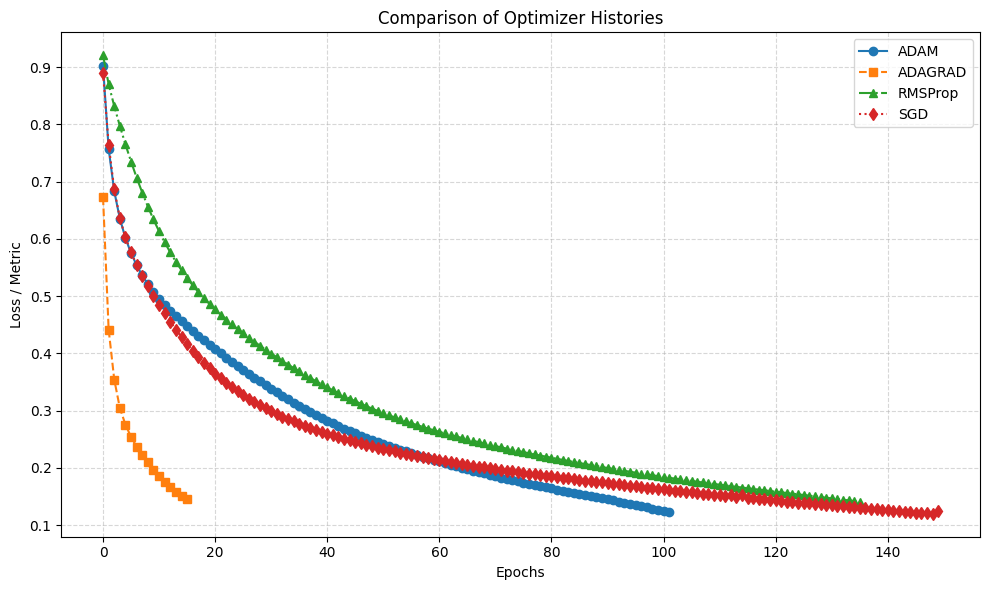

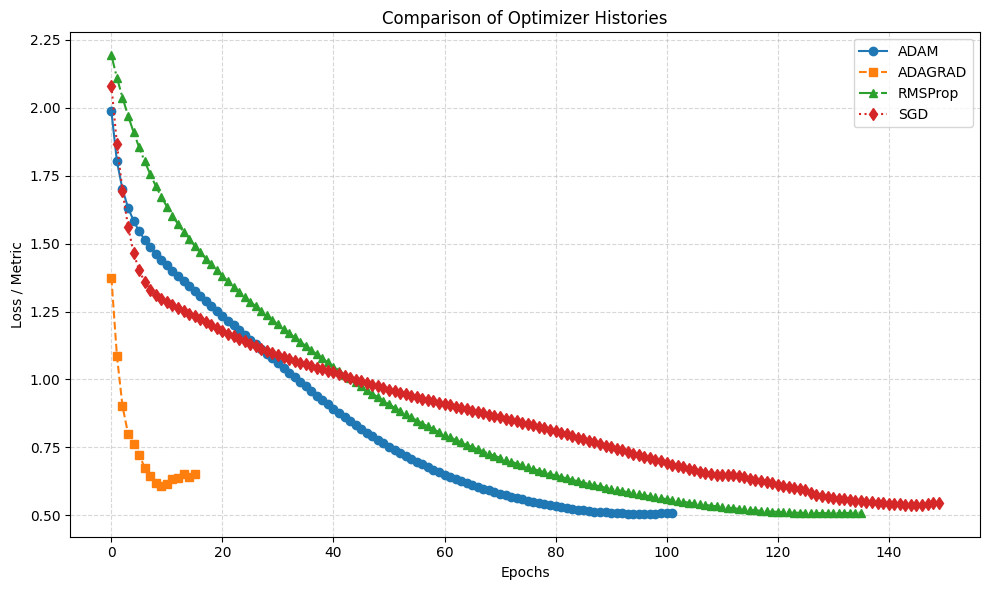


 Valutazione con ADAM
MSE: 0.5720, MAE: 0.5713, R²: 0.5009
Test Loss: 1.7270

 Valutazione con ADAGRAD
MSE: 0.5393, MAE: 0.5618, R²: 0.5294
Test Loss: 1.6312

 Valutazione con RMSprop
MSE: 0.5298, MAE: 0.5457, R²: 0.5377
Test Loss: 1.6015

 Valutazione con SGD
MSE: 0.5169, MAE: 0.5484, R²: 0.5490
Test Loss: 1.5699


In [ ]:
# Creazione del modello
hidden_size= 16
num_layers=1
output_size=1
input_size= len(ds.columns)-1
model_adam= LSTMModel(input_size, hidden_size, num_layers, output_size)
model_adagrad = LSTMModel(input_size, hidden_size, num_layers, output_size)
model_rmsprop = LSTMModel(input_size, hidden_size, num_layers, output_size)
model_sgd = LSTMModel(input_size, hidden_size, num_layers, output_size)

initial_state = model_adam.state_dict() # Salva lo stato iniziale del modello
model_adagrad.load_state_dict(initial_state)
model_rmsprop.load_state_dict(initial_state)
model_sgd.load_state_dict(initial_state)
# =====================
#  Addestramento
# =====================
criterion = nn.MSELoss()
patience = 6
epochs = 150

print("\n\nAddestramento con ADAM")
start_time = time.time()
loss_adam,losval_adam=train_model_adam(model_adam,train_loader,val_loader,criterion,epochs,patience)
adam_time = time.time() - start_time

print("\n\nAddestramento con ADAGRAD")
start_time = time.time()
loss_adagrad,losval_adagrad=train_model_adagrad(model_adagrad,train_loader,val_loader,criterion,epochs,patience)
adagrad_time = time.time() - start_time

print("\n\nAddestramento con RMSprop")
start_time = time.time()
loss_rmsprop,losval_rmsprop=train_model_rmsprop(model_rmsprop,train_loader,val_loader,criterion,epochs,patience)
rmsprop_time = time.time() - start_time

print("\n\nAddestramento con SGD")
start_time = time.time()
loss_sgd,losval_sgd=train_model_sgd(model_sgd,train_loader,val_loader,criterion,epochs,patience)
sgd_time = time.time() - start_time

print("\nTempo di addestramento con ADAM: ", adam_time)
print("\nTempo di addestramento con ADAGRAD: ", adagrad_time)
print("\nTempo di addestramento con RMSprop: ", rmsprop_time)
print("\nTempo di addestramento con SGD: ", sgd_time)


plot_optimizer_histories (loss_adam,loss_adagrad,loss_rmsprop,loss_sgd)
plot_optimizer_histories (losval_adam,losval_adagrad,losval_rmsprop,losval_sgd)
# =====================
# Valutazione
# =====================

print("\n Valutazione con ADAM")
test_loss_adam, predictions_adam, actuals_adam = evaluate_model(model_adam, test_loader, criterion)
print(f"Test Loss: {test_loss_adam:.4f}")

print("\n Valutazione con ADAGRAD")
test_loss_adagrad, predictions_adagrad, actuals_adagrad = evaluate_model(model_adagrad, test_loader, criterion)
print(f"Test Loss: {test_loss_adagrad:.4f}")

print("\n Valutazione con RMSprop")
test_loss_rmsprop, predictions_rmsprop, actuals_rmsprop = evaluate_model(model_rmsprop, test_loader, criterion)
print(f"Test Loss: {test_loss_rmsprop:.4f}")

print("\n Valutazione con SGD")
test_loss_sgd, predictions_sgd, actuals_sgd = evaluate_model(model_sgd, test_loader, criterion)
print(f"Test Loss: {test_loss_sgd:.4f}")

### VIsualizzazione dei risultati

ADAM


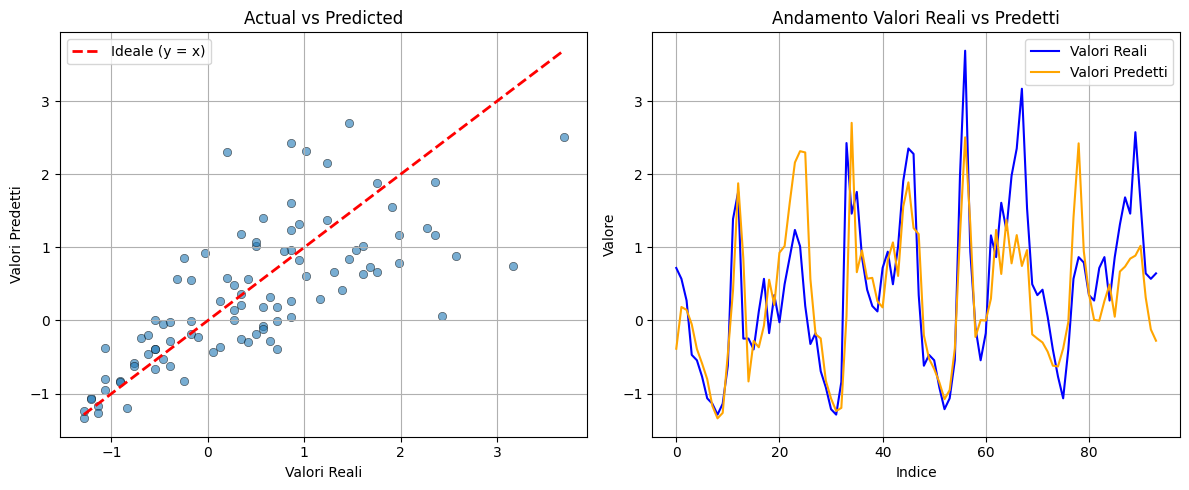

ADAGRAD


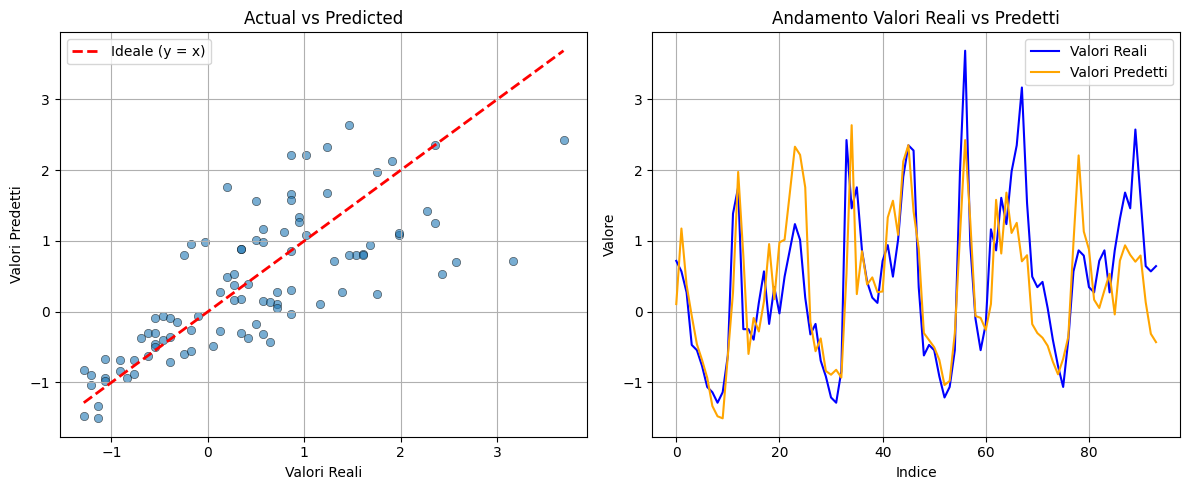

RMSprop


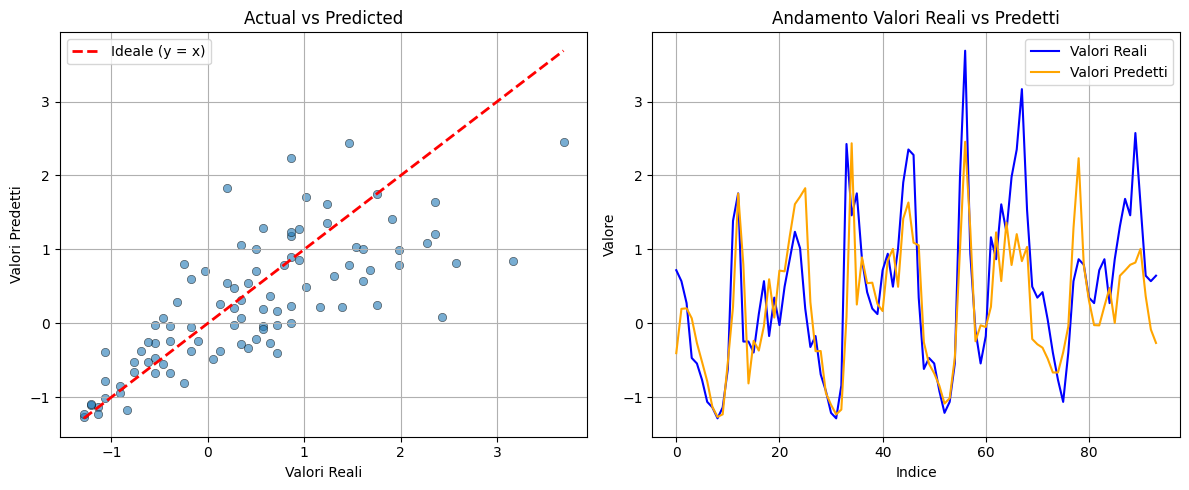

SGD


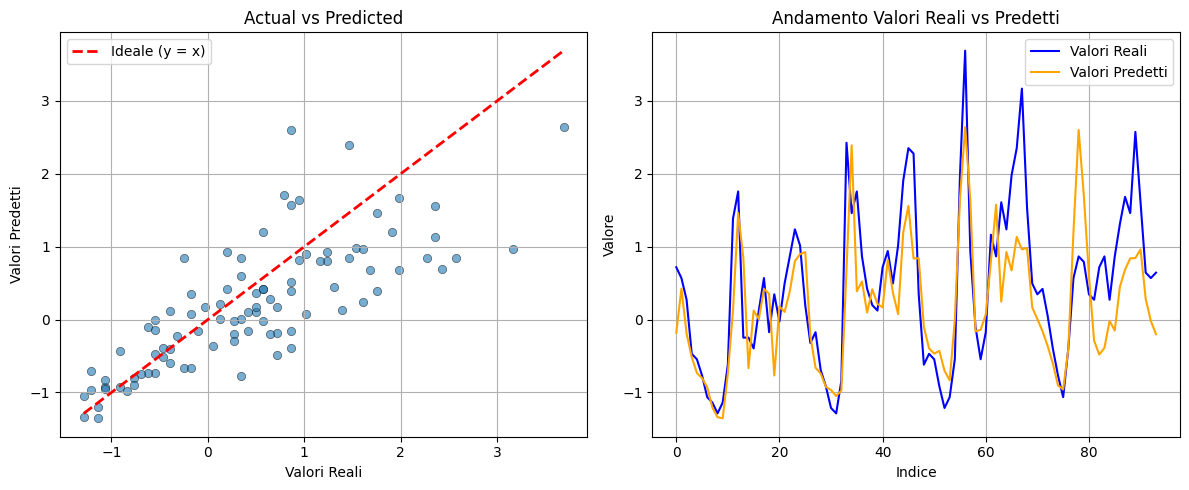

In [ ]:
print("ADAM")
plot_tot_actual_predicted(actuals_adam, predictions_adam)
print("ADAGRAD")
plot_tot_actual_predicted(actuals_adagrad, predictions_adagrad)
print("RMSprop")
plot_tot_actual_predicted(actuals_rmsprop, predictions_rmsprop)
print("SGD")
plot_tot_actual_predicted(actuals_sgd, predictions_sgd)

## Codice con ottimizzatori di Pytorch

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(




Addestramento con ADAM
Epoch 1: Train Loss: 1.2191, Val Loss: 1.7479
Epoch 2: Train Loss: 1.0822, Val Loss: 1.6883
Epoch 3: Train Loss: 0.9750, Val Loss: 1.6396
Epoch 4: Train Loss: 0.8830, Val Loss: 1.5983
Epoch 5: Train Loss: 0.8035, Val Loss: 1.5616
Epoch 6: Train Loss: 0.7361, Val Loss: 1.5274
Epoch 7: Train Loss: 0.6802, Val Loss: 1.4940
Epoch 8: Train Loss: 0.6344, Val Loss: 1.4600
Epoch 9: Train Loss: 0.5963, Val Loss: 1.4245
Epoch 10: Train Loss: 0.5641, Val Loss: 1.3872
Epoch 11: Train Loss: 0.5360, Val Loss: 1.3486
Epoch 12: Train Loss: 0.5112, Val Loss: 1.3098
Epoch 13: Train Loss: 0.4889, Val Loss: 1.2715
Epoch 14: Train Loss: 0.4688, Val Loss: 1.2343
Epoch 15: Train Loss: 0.4503, Val Loss: 1.1986
Epoch 16: Train Loss: 0.4330, Val Loss: 1.1640
Epoch 17: Train Loss: 0.4168, Val Loss: 1.1304
Epoch 18: Train Loss: 0.4015, Val Loss: 1.0975
Epoch 19: Train Loss: 0.3868, Val Loss: 1.0649
Epoch 20: Train Loss: 0.3728, Val Loss: 1.0327
Epoch 21: Train Loss: 0.3594, Val Loss: 1.00

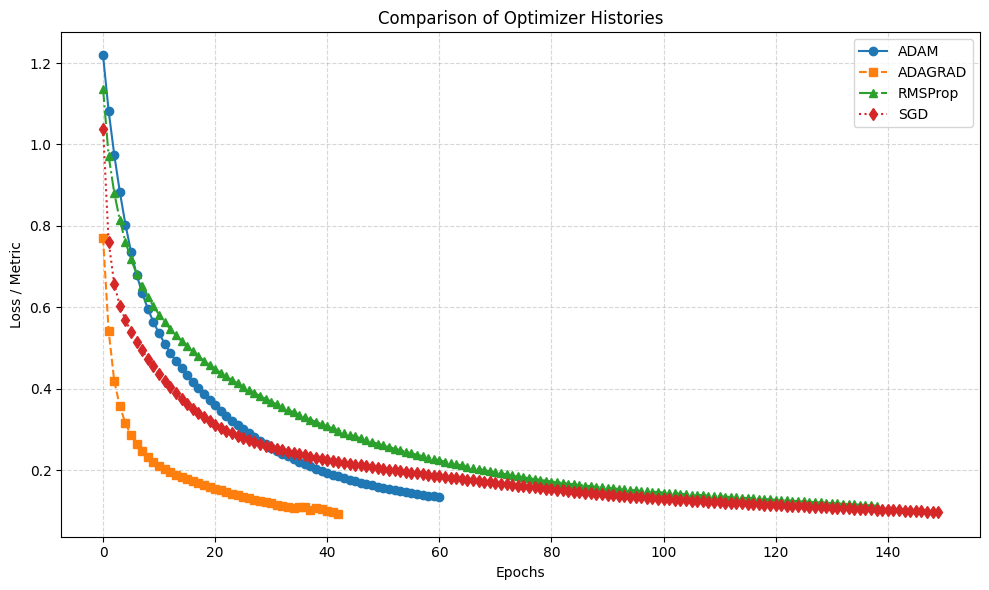

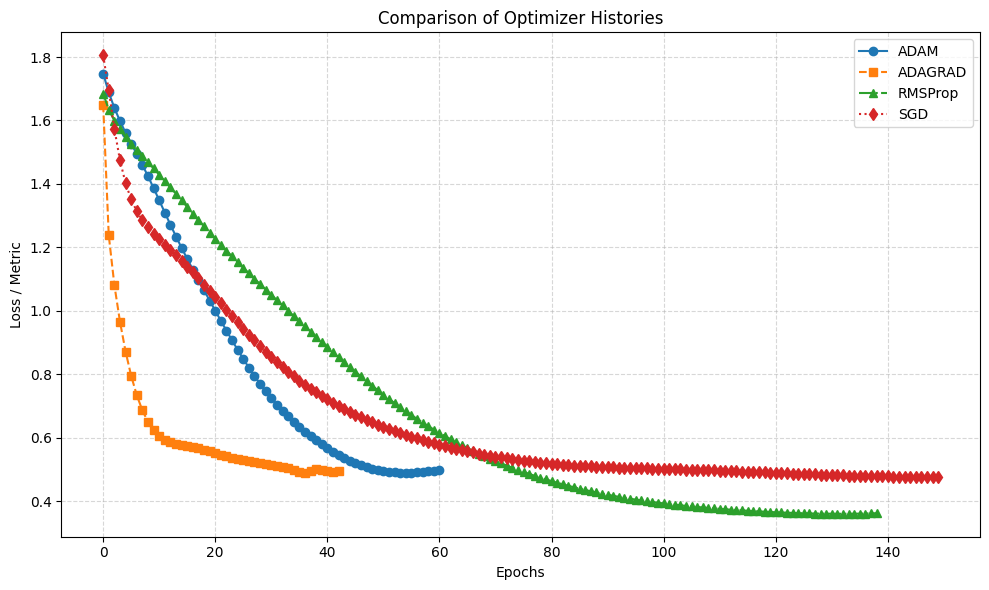


 Valutazione con ADAM
MSE: 0.4857, MAE: 0.5167, R²: 0.5762
Test Loss: 1.4629

 Valutazione con ADAGRAD
MSE: 0.4836, MAE: 0.5353, R²: 0.5780
Test Loss: 1.4659

 Valutazione con RMSprop
MSE: 0.4969, MAE: 0.5365, R²: 0.5664
Test Loss: 1.5034

 Valutazione con SGD
MSE: 0.6198, MAE: 0.6201, R²: 0.4591
Test Loss: 1.8854


In [ ]:
hidden_size= 16
num_layers=1
output_size=1
input_size= len(ds.columns)-1
model_adam= LSTMModel(input_size, hidden_size, num_layers, output_size)
model_adagrad = LSTMModel(input_size, hidden_size, num_layers, output_size)
model_rmsprop = LSTMModel(input_size, hidden_size, num_layers, output_size)
model_sgd = LSTMModel(input_size, hidden_size, num_layers, output_size)

initial_state = model_adam.state_dict() # Salva lo stato iniziale del modello
model_adagrad.load_state_dict(initial_state)
model_rmsprop.load_state_dict(initial_state)
model_sgd.load_state_dict(initial_state)

adam_optimizer = torch.optim.Adam(model_adam.parameters(), lr=0.001)
adagrad_optimizer = torch.optim.Adagrad(model_adagrad.parameters(), lr=0.05)
rmsprop_optimizer = torch.optim.RMSprop(model_rmsprop.parameters(), lr=0.0005)
sgd_optimizer = torch.optim.SGD(model_sgd.parameters(), lr=0.05)
# =====================
#  Addestramento
# =====================
criterion = nn.MSELoss()
patience = 6
epochs = 150

print("\n\nAddestramento con ADAM")
start_time = time.time()
loss_adam,losval_adam=train_model_opt(model_adam,train_loader,val_loader,criterion,adam_optimizer,epochs,patience)
adam_time = time.time() - start_time

print("\n\nAddestramento con ADAGRAD")
start_time = time.time()
loss_adagrad,losval_adagrad=train_model_opt(model_adagrad,train_loader,val_loader,criterion,adagrad_optimizer,epochs,patience)
adagrad_time = time.time() - start_time

print("\n\nAddestramento con RMSprop")
start_time = time.time()
loss_rmsprop,losval_rmsprop=train_model_opt(model_rmsprop,train_loader,val_loader,criterion,rmsprop_optimizer,epochs,patience)
rmsprop_time = time.time() - start_time

print("\n\nAddestramento con SGD")
start_time = time.time()
loss_sgd,losval_sgd=train_model_opt(model_sgd,train_loader,val_loader,criterion,sgd_optimizer,epochs,patience)
sgd_time = time.time() - start_time

print("\nTempo di addestramento con ADAM: ", adam_time)
print("\nTempo di addestramento con ADAGRAD: ", adagrad_time)
print("\nTempo di addestramento con RMSprop: ", rmsprop_time)
print("\nTempo di addestramento con SGD: ", sgd_time)


plot_optimizer_histories (loss_adam,loss_adagrad,loss_rmsprop,loss_sgd)
plot_optimizer_histories (losval_adam,losval_adagrad,losval_rmsprop,losval_sgd)
# =====================
# Valutazione
# =====================

print("\n Valutazione con ADAM")
test_loss_adam, predictions_adam, actuals_adam = evaluate_model(model_adam, test_loader, criterion)
print(f"Test Loss: {test_loss_adam:.4f}")

print("\n Valutazione con ADAGRAD")
test_loss_adagrad, predictions_adagrad, actuals_adagrad = evaluate_model(model_adagrad, test_loader, criterion)
print(f"Test Loss: {test_loss_adagrad:.4f}")

print("\n Valutazione con RMSprop")
test_loss_rmsprop, predictions_rmsprop, actuals_rmsprop = evaluate_model(model_rmsprop, test_loader, criterion)
print(f"Test Loss: {test_loss_rmsprop:.4f}")

print("\n Valutazione con SGD")
test_loss_sgd, predictions_sgd, actuals_sgd = evaluate_model(model_sgd, test_loader, criterion)
print(f"Test Loss: {test_loss_sgd:.4f}")

ADAM


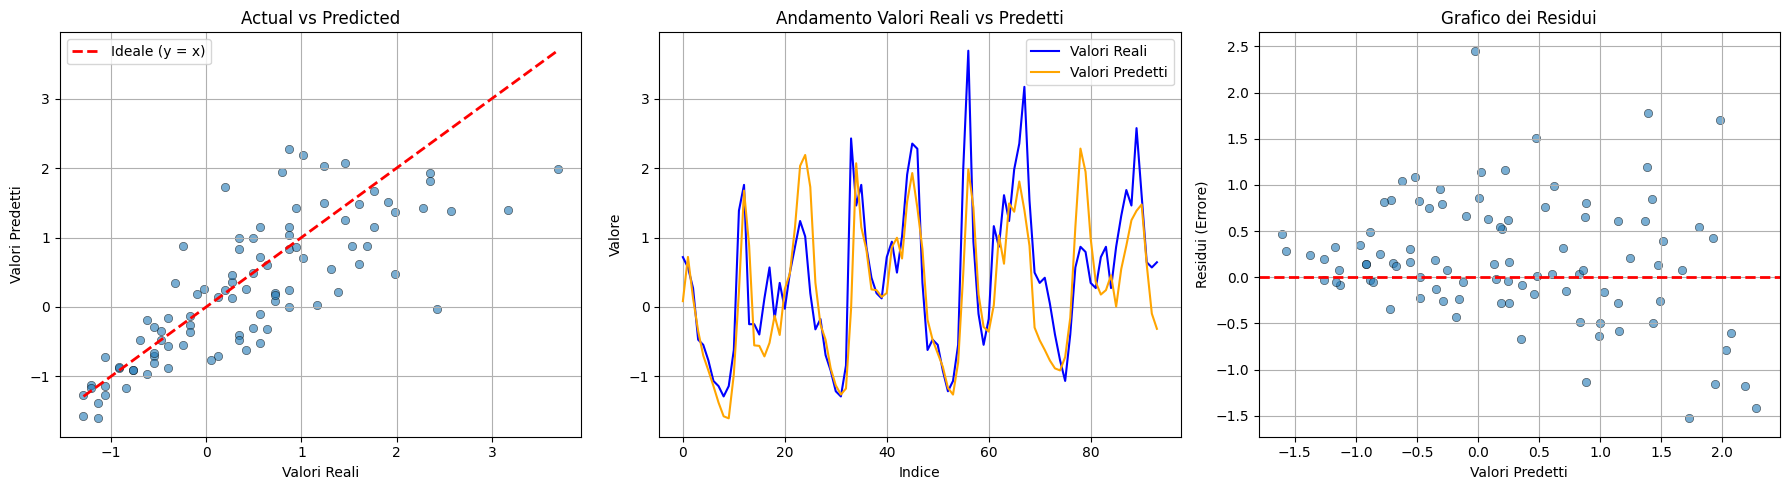

ADAGRAD


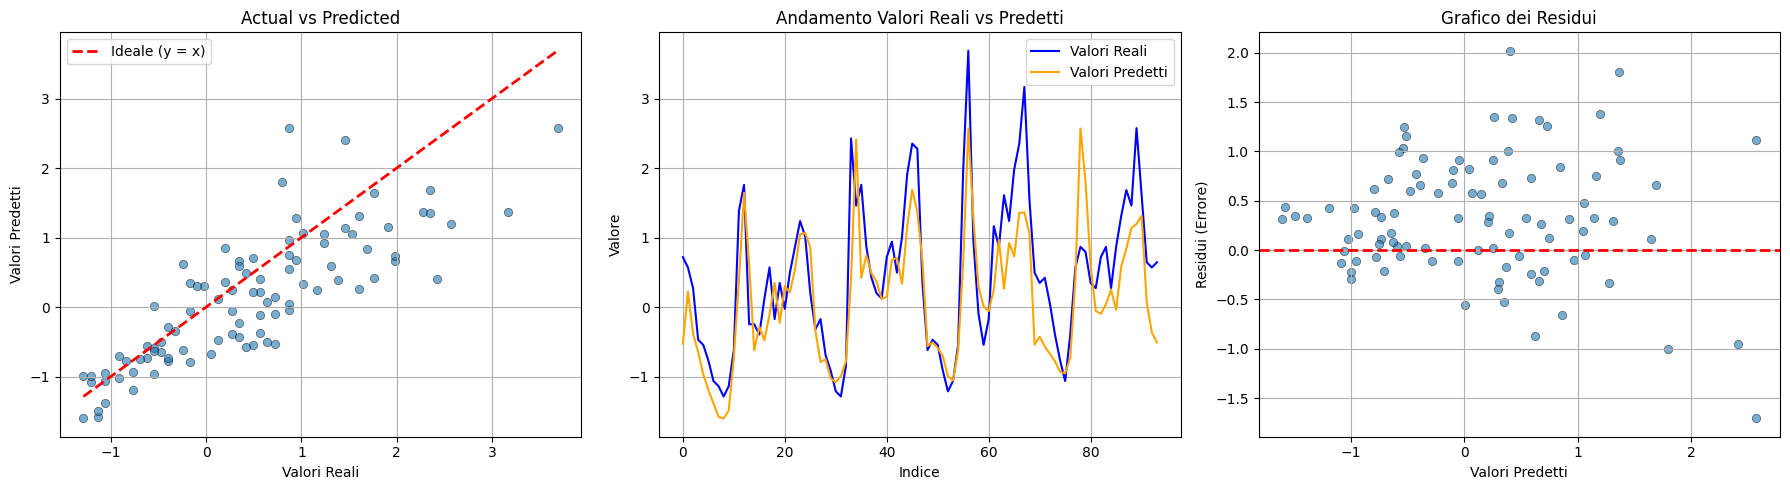

RMSprop


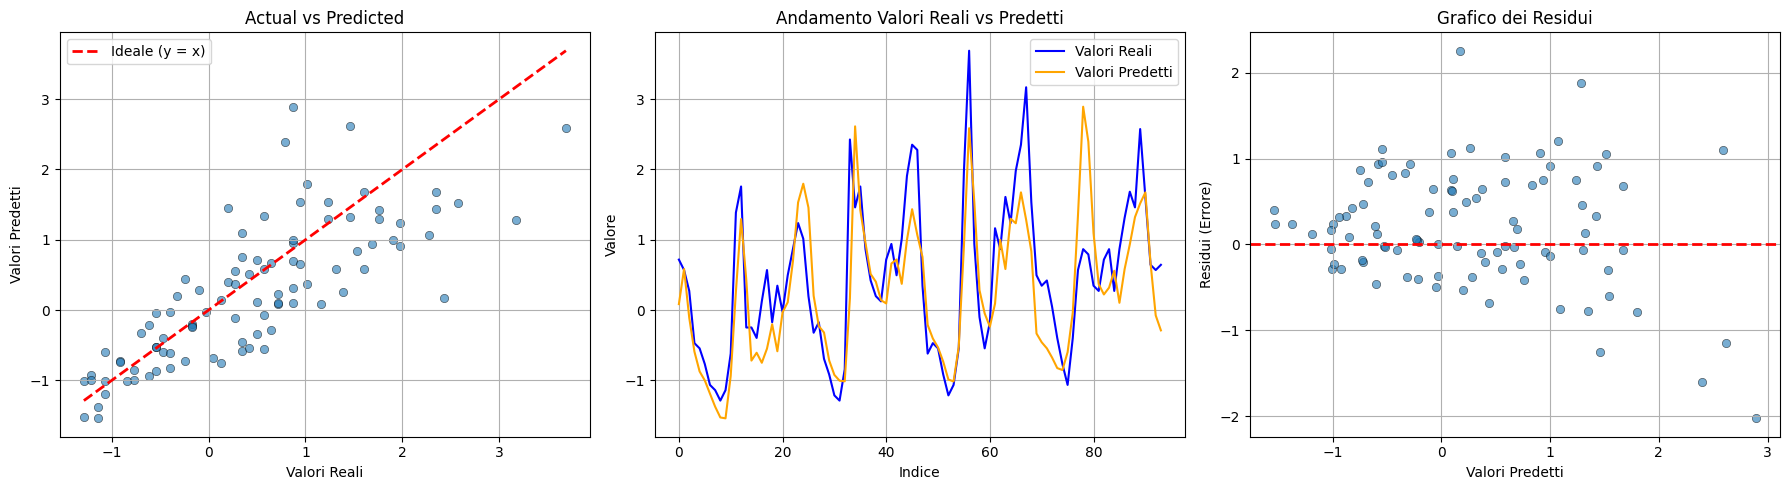

SGD


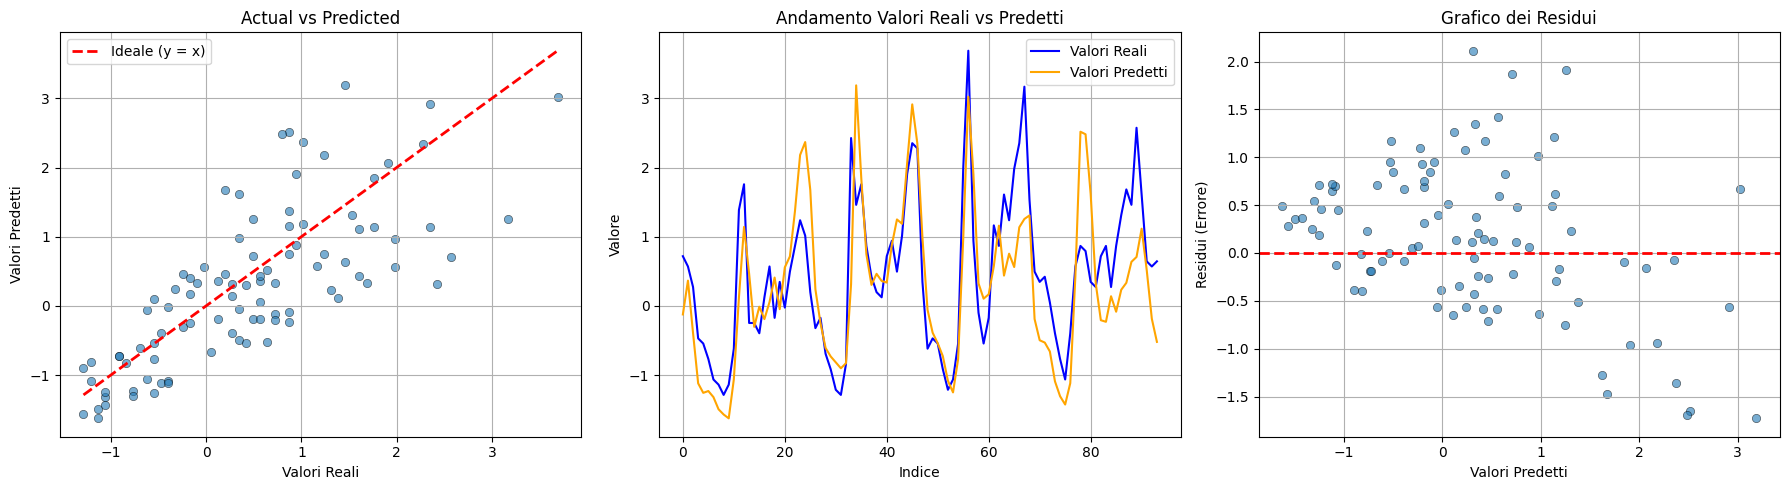

In [ ]:
print("ADAM")
plot_tot_actual_predicted(actuals_adam, predictions_adam)
print("ADAGRAD")
plot_tot_actual_predicted(actuals_adagrad, predictions_adagrad)
print("RMSprop")
plot_tot_actual_predicted(actuals_rmsprop, predictions_rmsprop)
print("SGD")
plot_tot_actual_predicted(actuals_sgd, predictions_sgd)